In [90]:
#!pip install nbimporter
import nbimporter
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from tqdm import tqdm

%run Fonctions_projet.ipynb

#Download data

#maybe better to export data from introduction before

#df of log returns
df_60m=pd.read_parquet("data/clean/60m/data_clean_60m_log_ret.parquet")



In [137]:
#Download tickers

tickers = pd.read_csv('tickers/s&p.csv')
tickers.sort_values(by="Symbol", inplace=True)
tickers.reset_index(drop=True, inplace=True)

#Keep only tickers in df_60m
tickers=tickers.iloc[np.where(tickers["Symbol"].isin(df_60m.columns))]
tickers

,Symbol,Name,Sector
0,A,Agilent Technologies,Health Care
1,AAL,American Airlines Group,Industrials
2,AAP,Advance Auto Parts,Consumer Discretionary
3,AAPL,Apple,Information Technology
4,ABBV,AbbVie,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBH,Zimmer Biomet,Health Care
502,ZBRA,Zebra Technologies,Information Technology
503,ZION,Zions Bancorp,Financials


In [43]:
def plot_close(df, x, y, hue=None, title='Ticker', x_label=None, y_label=None, save_name=None):
    ax = sns.lineplot(data=df, x=x, y=y, hue=hue)
    ax.set_title(title)
    plt.xticks(rotation=45)
    
    if x_label:
        ax.set_xlabel(x_label)
        
    if y_label:
        ax.set_ylabel(y_label)
    
    if save_name:
        if not os.path.exists('plots'):
            os.mkdir('plots')
        plt.savefig(f"plots/{save_name}.svg", bbox_inches = "tight")
    plt.show()

In [123]:
#Order df_60m by ticker name

df_60m=df_60m[tickers["Symbol"]]
df_60m

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-29 11:30:00-05:00,0.001362,-0.005537,-0.003498,-0.000367,0.001017,-0.002269,-0.001282,0.000890,0.001564,0.001696,...,0.000595,0.010061,-0.000851,-0.000846,0.001327,0.001504,0.000861,0.000040,-0.002858,-0.001576
2020-01-29 12:30:00-05:00,0.001587,-0.004266,-0.001073,0.000092,0.000239,0.004589,-0.002624,0.001555,-0.001730,-0.000593,...,-0.000447,0.004074,0.000851,0.002029,0.001445,0.001314,0.003041,0.002097,-0.002016,-0.001004
2020-01-29 13:30:00-05:00,-0.002154,-0.001488,-0.002508,0.000122,-0.001435,-0.002706,-0.004011,-0.002111,-0.003589,-0.001358,...,0.000625,-0.008053,-0.001575,0.000507,0.005161,-0.001502,-0.000066,0.001993,-0.005325,-0.000215
2020-01-29 14:30:00-05:00,-0.006434,0.001302,-0.004531,0.001345,-0.000958,-0.001661,0.000854,-0.002785,-0.006210,-0.002706,...,0.000268,-0.005631,-0.002383,-0.003212,0.000838,0.001924,-0.000528,-0.000677,-0.006858,-0.000718
2020-01-29 15:30:00-05:00,-0.003605,-0.003165,-0.001190,-0.008840,-0.003600,-0.004108,-0.005761,-0.005817,-0.003792,-0.002060,...,0.002525,-0.005549,-0.002803,-0.001865,-0.005157,-0.000141,-0.004435,-0.002813,-0.002584,-0.004969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-26 14:30:00-05:00,-0.032870,-0.036840,-0.023920,-0.024363,-0.007900,-0.017553,-0.015929,-0.008262,-0.035181,-0.029464,...,-0.007854,-0.036198,-0.016964,-0.023696,-0.021176,-0.017875,-0.015398,-0.026908,-0.017544,-0.023956
2022-01-26 15:30:00-05:00,0.005041,-0.000923,0.003341,0.003385,0.003362,0.009007,-0.002556,0.001416,0.003062,0.000600,...,0.005341,-0.001461,0.005395,0.007644,-0.000880,0.002835,-0.001661,0.009506,0.009702,-0.001212
2022-01-27 09:30:00-05:00,0.010972,0.000308,0.011145,0.017400,0.021032,0.017924,-0.003171,0.017784,0.026143,0.008865,...,0.018328,0.042786,0.010171,0.012298,0.004294,0.007218,0.008278,0.005932,0.009903,0.000158


In [193]:
#Rolling clustering for 60m dataset


#Cluster tickers

#Compute T=3*N
N=df_60m.shape[1]
T=3*N

#Number of windows possible
lag_max=df_60m.shape[0]-T
liste=RolledCluster(df_60m,T,"louvain_cluster/asset",False,False,lag_max)

In [194]:
liste_cluster=dask.compute(dask.compute(liste))[0][0]
liste_cluster

  0%|          | 0/11 [00:00<?, ?it/s]


[      Cluster
 A           0
 AAL         1
 AAP         2
 AAPL        3
 ABBV        4
 ...       ...
 YUM       498
 ZBH       499
 ZBRA      500
 ZION      501
 ZTS       502
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         2
 AAPL        3
 ABBV        4
 ...       ...
 YUM       498
 ZBH       499
 ZBRA      500
 ZION      501
 ZTS       502
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         2
 AAPL        3
 ABBV        4
 ...       ...
 YUM       498
 ZBH       499
 ZBRA      500
 ZION      501
 ZTS       502
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         2
 AAPL        3
 ABBV        4
 ...       ...
 YUM       498
 ZBH       499
 ZBRA      500
 ZION      501
 ZTS       502
 
 [503 rows x 1 columns],
       Cluster
 A           0
 AAL         1
 AAP         2
 AAPL        3
 ABBV        4
 ...       ...
 YUM       498
 ZBH       499
 ZBRA      500
 ZION      501
 ZTS   

In [195]:
number_of_clusters=[]
for element in tqdm(liste_cluster):
    number_of_clusters.append(element["Cluster"].unique().max()+1)

#Create dataframe for plotting reasons
df_plot_clusters= pd.DataFrame(number_of_clusters)
df_plot_clusters["Datetime"]=df_60m[df_60m.index>"2020-12-04 11:30:00-05:00"].index
df_plot_clusters.rename(columns={0: "Clusters", "Datetime": "Datetime"},inplace=True)
df_plot_clusters

100%|██████████| 2010/2010 [00:00<00:00, 6376.70it/s]


,Clusters,Datetime
0,503,2020-12-04 12:30:00-05:00
1,503,2020-12-04 13:30:00-05:00
2,503,2020-12-04 14:30:00-05:00
3,503,2020-12-04 15:30:00-05:00
4,503,2020-12-07 09:30:00-05:00
...,...,...
2005,3,2022-01-26 14:30:00-05:00
2006,3,2022-01-26 15:30:00-05:00
2007,3,2022-01-27 09:30:00-05:00
2008,3,2022-01-27 10:30:00-05:00


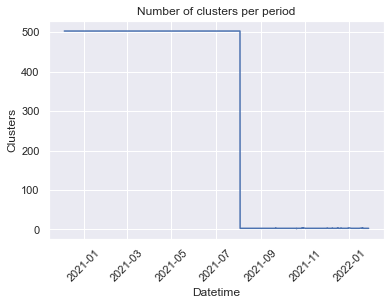

In [72]:
plot_close(df_plot_clusters, x="Datetime", y="Clusters", hue=None, title='Number of clusters per period', x_label=None, y_label=None, save_name=None)


In [65]:
#Get position of drop

cut=0
while number_of_clusters[cut]>10:
    cut=cut+1

cut

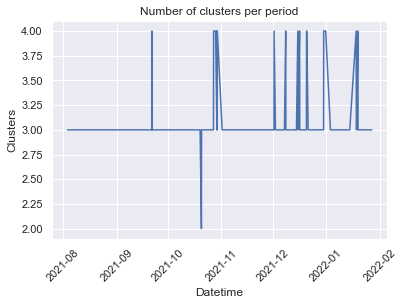

3    812
4     47
2      1
Name: Clusters, dtype: int64

In [133]:
plot_close(df_plot_clusters[cut:], x="Datetime", y="Clusters", hue=None, title='Number of clusters per period', x_label=None, y_label=None, save_name=None)
df_plot_clusters["Clusters"][cut:].value_counts()


In [196]:
#Add column for ARI measure

ARI= RolledARI(liste_cluster)
ARI
ARI.insert(0,1)
df_plot_clusters["ARI"]=ARI

df_plot_clusters

100%|██████████| 2009/2009 [00:02<00:00, 670.41it/s]


,Clusters,Datetime,ARI
0,503,2020-12-04 12:30:00-05:00,1.000000
1,503,2020-12-04 13:30:00-05:00,1.000000
2,503,2020-12-04 14:30:00-05:00,1.000000
3,503,2020-12-04 15:30:00-05:00,1.000000
4,503,2020-12-07 09:30:00-05:00,1.000000
...,...,...,...
2005,3,2022-01-26 14:30:00-05:00,0.977469
2006,3,2022-01-26 15:30:00-05:00,0.981822
2007,3,2022-01-27 09:30:00-05:00,0.977019
2008,3,2022-01-27 10:30:00-05:00,0.982472


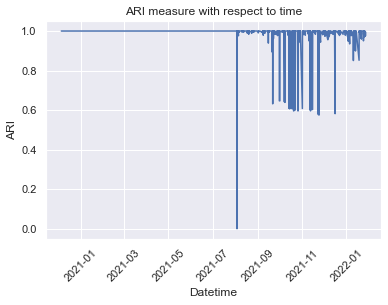

In [86]:
plot_close(df_plot_clusters, x="Datetime", y="ARI", hue=None, title='ARI measure with respect to time', x_label=None, y_label=None, save_name=None)



In [197]:
for i in tqdm(range(cut+1,len(liste_cluster)-1)):
    if len(liste_cluster[i].value_counts())==len(liste_cluster[i+1].value_counts()):
        liste_cluster[i+1]=keep_cluster_number(liste_cluster[i],liste_cluster[i+1])

100%|██████████| 858/858 [00:22<00:00, 37.80it/s]


In [216]:
aa=pd.DataFrame(np.zeros((3, len(tickers["Sector"].unique()))), index=range(3), columns=tickers["Sector"].unique())
aa

,Health Care,Industrials,Consumer Discretionary,Information Technology,Consumer Staples,Utilities,Financials,Materials,Real Estate,Energy,Communication Services
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
#create dataframe of composition of clusters of size k
def composition_matrix(tickers, df_plot_clusters, liste_cluster, k=3, axis=0):
    
    #Create dataframe
    df=pd.DataFrame(np.zeros((k, len(tickers["Sector"].unique()))), index=range(k), columns=tickers["Sector"].unique())
    
    #loop over each cluster
    for cluster in tqdm(df_plot_clusters[df_plot_clusters["Clusters"]==k].index):
        
         
        for i in range(k): 

            #Groupby sector the tickers belonging to cluster i
            test=tickers[tickers["Symbol"].isin(liste_cluster[cluster][liste_cluster[cluster]["Cluster"]==i].index)].groupby("Sector")

            #for each sector, add number of elements to df
            for sector in tickers["Sector"].unique():
                
                try :
                    df[sector][i]=df[sector][i]+len(test.get_group(sector))
                   
                #Except means that there is no tickers belonging to element    
                except KeyError:
                    df[sector][i]=df[sector][i]+0
    
    
    if axis==0:
        for index in range(k):
            df.iloc[index]=df.iloc[index]/df.iloc[index].sum()*100
    else:
        df=df/df.sum(axis=0)*100
        
    df= df.round(decimals=2)     
    return(df)
    

In [278]:
df=composition_matrix(tickers,df_plot_clusters,liste_cluster, 3, 1)
df

100%|██████████| 812/812 [00:11<00:00, 71.83it/s]


,Health Care,Industrials,Consumer Discretionary,Information Technology,Consumer Staples,Utilities,Financials,Materials,Real Estate,Energy,Communication Services
0,46.45,28.35,41.47,61.71,24.80,21.08,30.57,28.02,26.82,26.47,43.66
1,36.03,16.66,9.29,15.45,49.44,67.86,10.19,12.66,37.18,0.19,12.17
2,17.52,54.99,49.24,22.84,25.76,11.07,59.24,59.32,36.00,73.35,44.16


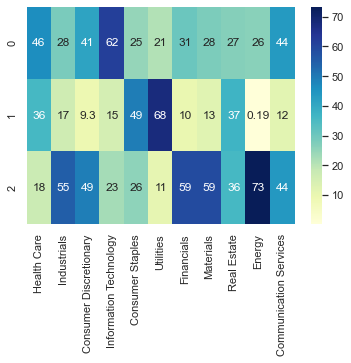

In [279]:
ax = sns.heatmap(df, annot=True,cmap="YlGnBu")

In [271]:
clus=liste_cluster[0]

In [274]:
a=(clus["Cluster"]==0)*1

In [275]:
b=(clus["Cluster"]==0)*1

In [277]:
a@b

1